<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.951 · Tipologia i cicle de vida de les dades · Pràctica 2</p>
<p style="margin: 0; text-align:right;">2019-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Pràctica 2: Neteja i Anàlisi de les Dades

La pràctica 2 de l'assignatura de **Tipologia i cicle de vida de les dades** demana *elaborar un cas pràctic orientat a aprendre a identificar les dades rellevants per un projecte analític i usar les eines d'integració, neteja, validació i anàlisi de les mateixes.*

Per a la realització de la pràctica, dels diferents fitxers disponibles en obert a https://www.kaggle.com, s'ha seleccionat com a punt de partida el fitxer https://www.kaggle.com/jealousleopard/goodreadsbooks. Aquest fitxer (en endavant l'anomenarem **goodreads**) conté 13.719 registres corresponents a llibres publicats i amb ISBN vàlid així com, entre altres dades, la mitjana de la valoració dels usuaris de la web https://www.goodreads.com/. 

La web https://www.goodreads.com té com a missió: *is the world’s largest site for readers and book recommendations. Our mission is to help people find and share books they love. Goodreads launched in January 2007.*


## Índex

1. [Objectiu](#1-Objectiu) 
3. [Descripció del fitxer **goodreads**](#2-Descripció)
4. [Neteja de dades](#3-Neteja-de-dades) 
    1. [Integració](#3.A-Integració)
    2. [Selecció](#3.B-Selecció)
    3. [Reducció](#3.C-Reducció)
    4. [Conversió](#3.D-Conversió)
    5. [Valors Perduts](#3.E-Valors-Perduts)
    6. [Valors Extrems](#3.F-Valors-Extrems)
5. [Anàlisi de dades](#4-Anàlisi-de-dades)
    1. [Anàlisi estadística descriptiva](#4.A-Anàlisi-estadística-descriptiva)
    2. [Anàlisi inferencial](#4.B-Anàlisi-inferencial)
        1. [Correlació entre variables. Regressió Lineal](#4.B.a-Correlació-entre-variables)
        2. [Comprovació de normalitat i homoscedasticitat](#4.B.b-Comprovació-de-normalitat-i-homoscedasticitat)
        3. [Contrast d'hipòtesis](#4.B.c-Contrast-d'hipòtesis)
6. [Clusterització](#5-Clusterització)
8. [Resum](#6-Resum)
10. [Bibliografia](#7-Bibliografia)


# 1 Objectiu

Com ja s'ha indicat, l'objectiu genèric d'aquest treball és realitzar la pràctica 3, `Neteja i Anàlisi de les Dades`, de l'assignatura *Tipologia i cicle de vida de les dades*. 

Objectius concrets de la pràctica, en base al fitxer **goodreads** objecte de l'estudi:

+ Obtenir el fitxer **goodreads**. Realitzar una anàlisi preliminar del seu contingut.
+ Estudiar la qualitat de les dades i realitzar un cicle de neteja de les dades, en les seves diferents etapes: *integració*, *selecció*, *reducció*, *conversió*, *valors perduts* i *valors extrems*. Obtenció del fitxer depurat final objecte d'estudi.
+ Fer una anàlisi de les dades des del punt de vista descriptiu i inferencial. Realitzar un exercici de contrast d'hipòtesis per a diferents col·lectius del fitxer.
+ Definir un procés de clusterització en base a un mètode de segmentació no supervisat.


# 2 Descripció

El fitxer conté 13.719 registres corresponents a edicions de llibres avaluats o comentats a la xarxa **goodreads** (https://www.goodreads.com) amb la informació que es relaciona a continuació.

El fitxer ha estat confeccionat per *Soumik* (https://www.kaggle.com/jealousleopard). 

Contingut del fitxer:

|Columna|Descripció|Observació|
|:-------|:----------|:---------|
|**bookID**|Identificador únic per a cada registre (llibre) |Notar que una mateixa *obra* pot publicar-se en diferents edicions, idiomes, ... En aquest cas, cada edició diferent és un registre diferent en aquest fitxer|
|**title**| Títol del llibre|
|**authors**|Autor o autors del llibre|En cas d'haver més d'un autor, els separa un guió|
|**average_rating**|Mitjana de la valoració realitzada pels usuaris de goodreads|
|**isbn**|ISBN (10 Dígits), format antic codi universal ISBN de cada llibre|Notar que un mateix llibre amb diferents publicacions té diferents ISBN i, a efectes d'aquest estudi, són llibres diferents|
|**isbn13**|ISBN (13 dígits). Nou format de ISBN de 13 dígits|
|**language_code**|Idioma d'aquesta edició del llibre|
|**# num_pages**|Número de pàgines del llibre|
|**ratings_count**|Nombre de valoracions (ratings) del llibre realitzades pels usuaris|
|**text_reviews_count**|Nombre de comentaris realitzats pels usuaris|

Durant la neteja de les dades s'exposarà la necessitat de completar les dades del fitxer amb les que es mostren a la taula següent:

|Columna|Descripció|Origen de la informació|
|:-------|:----------|:---------|
|**any_publ**|Any de publicació del fitxer|La web de Goodreads, en el seu defecte la web gestora del ISBN|
|**len_desc**|Longitud, nombre de caràcters, de la sinopsi del llibre a Goodreads|len(sinopsi)|
|**any_naix**| Any de naixement de l'autor|Wikipedia|
|**sexe**|Sexe de l'autor|Wikipedia


Per a la realització de la pràctica, es precisarà de les següents llibreries:

In [2]:
import numpy as np                   
import pandas as pd                  
import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import goodreads_api_client as gr
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

Lectura del fitxer, resum de les dades i primers registres:

In [3]:
df = pd.read_csv('books.csv', error_bad_lines = False)
print("\nEl nombre de columnes del fitxer són: {} i s'anomenen:\n {}".format(len(df.columns), df.columns))
print("\nEl fitxer conté {} files i {} columnes.\n".format(df.shape[0], df.shape[1]))
print("\nMesures de tendència i de dispersió de les columnes numèriques:\n", df.describe())
print("\nInformació de freqüències de les dades no numèriques:\n", df.describe(exclude=[np.number]))
print ("\nFormat de dades de cada variable del DataFrame\n", df.dtypes)
print ("\nEls primers registres del fitxer són:\n", df.head())

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'



El nombre de columnes del fitxer són: 10 i s'anomenen:
 Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

El fitxer conté 13714 files i 10 columnes.


Mesures de tendència i de dispersió de les columnes numèriques:
              bookID  average_rating        isbn13   # num_pages  \
count  13714.000000    13714.000000  1.371400e+04  13714.000000   
mean   22159.859195        3.930620  9.764017e+12    342.402727   
std    13700.926816        0.357893  3.987679e+11    252.650165   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10619.250000        3.770000  9.780345e+12    196.000000   
50%    21321.500000        3.960000  9.780613e+12    301.000000   
75%    33311.750000        4.130000  9.780940e+12    421.000000   
max    47709.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count  
count   1.3

# 3 Neteja de dades
De l'anàlisi preliminar realitzada a l'apartat anterior, s'observen les següents situacions en principi anòmales:

1. Dades no carregades: El sistema mostra un avís advertint que 5 registres no s'han pogut carregar per estar **fora de format** (tenen 11 columnes quan se n'esperaven 10)
2. Columna **authors** pot tenir diversos autors, separats per guions. 
3. Columna **num_pages** té un mínim de llibre(s) amb 0 pàgines i un màxim de llibre(s) amb 6576 pàgines. Caldrà revisar la bondat d'aquests valors extrems.
4. Columna **average_rating** amb un mínim de zero i un màxim de cinc. Caldrà revisar la correcció d'aquestes observacions.
5. Columnes **ratings_count** i **text_reviews_count** tenen un mínim de 0 i en tots dos casos uns valors molt elevats (5.629.932 i 93.619 respectivament), caldrà revisar aquesta informació.
6. Columna **isbn13**, només a títol indicatiu, s'observa que és de tipus float. no és categòrica ni string.
7. Columna string **title**, a títol indicatiu, té registres amb freqüència superior a 1. Existeixen llibres que, essent el mateix títol, tenen diferents edicions o formats amb isbn diferents; el mateix per a les columnes **authors** i **language_code**.  

Abans de recórrer formalment les 7 etapes que conformen la fase de Neteja de Dades, revisarem i resoldrem, si s'escau, cadascuna de les 4 anomalies detectades (punts 1 a 4 anteriors):

#### Dades fora de format i no carregades
Donat que el nombre de registres anòmals és baix (5), s'ha considerat que es pot resoldre manualment. El fitxer s'ha visualitzat amb l'eina `Google-Fulls de càlcul`. Donat que el Warning adverteix d'una onzena columna, s'ordena el fitxer per aquesta onzena columna, resultant el que mostra la següent imatge:
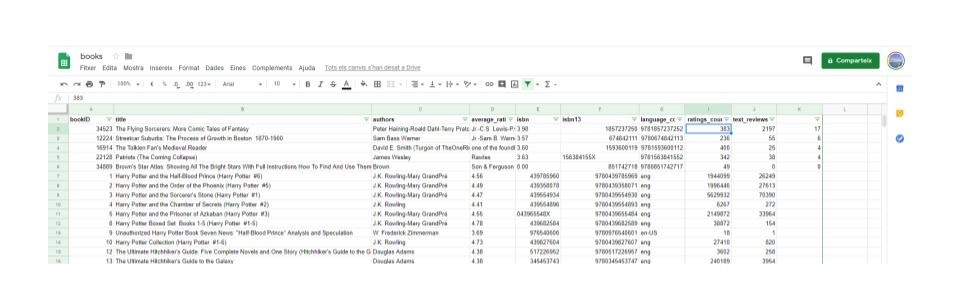
La inspecció visual, mostra que el problema prové de que en els 5 casos, els llibres són multiautor i en alguns casos la separació entre un i altre autor s'ha fet amb una coma, provocant el corriment de les columnes. Així mateix, per fer una doble comprovació, s'accedeix a la web de goodreads amb un dels ISBN (veure https://www.goodreads.com/book/show/34523.The_Flying_Sorcerers) i es comprova que, efectivament les dades numèriques **Num_pages**, **Ratings_count** i **text_reviews_count** estan desplaçades i cal córrer-les una columna a l'esquerra (la coincidència no és exacta ja que la informació de la web és actualitzada al moment de la consulta i el fitxer és de data maig del 2019)
Es corregeix manualment els 5 registres erronis del fitxer original, *books.csv*, i es crea un nou fitxer ***books2.csv***: 
El resultat:

In [4]:
# Lectura del fitxer books2.csv, copia del books.csv amb els 5 registres erronis corregits manualment
df = pd.read_csv('books2.csv', error_bad_lines = False)
print("\nEl nombre de columnes del fitxer són: {} i s'anomenen:\n {}".format(len(df.columns), df.columns))
print("\nEl fitxer conté {} files i {} columnes.\n".format(df.shape[0], df.shape[1]))
print("\nMesures de tendència central i de dispersió de les columnes numèriques:\n", df.describe())
print("\nInformació de freqüències de les dades no numèriques:\n", df.describe(exclude=[np.number]))
print ("\nFormat de dades de cada variable del DataFrame\n", df.dtypes)
print ("\nEls primers registres del fitxer són:\n", df.head())


El nombre de columnes del fitxer són: 10 i s'anomenen:
 Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

El fitxer conté 13719 files i 10 columnes.


Mesures de tendència central i de dispersió de les columnes numèriques:
              bookID  average_rating        isbn13   # num_pages  \
count  13719.000000    13719.000000  1.371900e+04  13719.000000   
mean   22160.579270        3.930265  9.764024e+12    342.380713   
std    13699.603351        0.359432  3.986954e+11    252.618887   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10621.000000        3.770000  9.780345e+12    196.000000   
50%    21322.000000        3.960000  9.780613e+12    301.000000   
75%    33322.000000        4.130000  9.780940e+12    421.000000   
max    47709.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count  
cou

Observar que ara el nombre de registres s'ha incrementat en 5, passant de 13.714 a 13.719 i ja no es dóna cap avís d'error donat que s'han corregit els registres erronis.

#### Columna **authors**: diversos autors d'un mateix llibre.
Com ja s'ha descrit, la columna **authors**, per a determinats registres, pot contenir més d'un nom separat per comes. Com a exemple, la imatge anterior mostra que en els llibres de Harry Potter hi consten com autors J.K. Rowling i Mary GrandPré. Òbviament, Mary GrandPré no és l'autora sinó la il·lustradora del llibre. 

Per a simplificar, adoptarem el criteri en aquesta pràctica de quedar-nos només amb l'autor identificat en primer lloc. Es crearà una nova columna **author_1** que contindrà aquest primer autor en cas d'haver-ne més d'un o bé l'autor únic en cas de ser només un:

In [6]:
# Crear una nova columna amb el primer autor de la columna authors
df["author_1"] = ""
for k, autor in enumerate(df["authors"]):
    id = autor.find("-")
    if id == -1:
        df["author_1"][k] = df["authors"][k]
    else:
        df["author_1"][k] = df["authors"][k][:id].strip()
print ("Llistar, per comprovació, els primers registres de la columna authors:")
print (df["authors"].head(10))
print ("\nLlistar, per comprovació, la columna resultant amb un autor únic (el primer) de la columna 'authors':")
print (df["author_1"].head(10))

Llistar, per comprovació, els primers registres de la columna authors:
0    J.K. Rowling-Mary GrandPré
1    J.K. Rowling-Mary GrandPré
2    J.K. Rowling-Mary GrandPré
3                  J.K. Rowling
4    J.K. Rowling-Mary GrandPré
5    J.K. Rowling-Mary GrandPré
6        W. Frederick Zimmerman
7                  J.K. Rowling
8                 Douglas Adams
9                 Douglas Adams
Name: authors, dtype: object

Llistar, per comprovació, la columna resultant amb un autor únic (el primer) de la columna 'authors':
0              J.K. Rowling
1              J.K. Rowling
2              J.K. Rowling
3              J.K. Rowling
4              J.K. Rowling
5              J.K. Rowling
6    W. Frederick Zimmerman
7              J.K. Rowling
8             Douglas Adams
9             Douglas Adams
Name: author_1, dtype: object


#### Registres amb nombre de pàgines 0 o valors molt alts.

De l'observació inicial de les dades, es coneix que hi ha registres (llibres) amb 0 pàgines i altres amb un nombre elevat (màxim de 6576). S'analitzen aquests casos extrems:

In [7]:
control1 = df[df["# num_pages"] < 25]
print ("Nombre de llibres amb nombre de pàgines inferior a 25: {}".format(control1.shape[0]))
print ("\nPrimers llibres amb nombre de pàgines inferior a 25:\n")
print (control1.head(10))
control2 = df[df["# num_pages"] > 4000]
print ("\nNombre de llibres amb nombre de pàgines superior a 4000: {}".format(control2.shape[0]))
print ("\nPrimers llibres amb nombre de pàgines superior a 4000:\n")
print (control2.head(10)) 

Nombre de llibres amb nombre de pàgines inferior a 25: 357

Primers llibres amb nombre de pàgines inferior a 25:

     bookID                                              title  \
11       16  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
44       68                                    The Known World   
235     524                                  Lord of the Flies   
335     936                                Memoirs Of A Geisha   
339     955  The 5 Love Languages / The 5 Love Languages Jo...   
342     966                                 Angeles & Demonios   
361    1053                         The Richest Man in Babylon   
369    1090  Purpose Driven Life - For Commuters: What on E...   
417    1281            Men Are from Mars  Women Are from Venus   
421    1297  The Clan of the Cave Bear  Part 1 of 2 (Earth'...   

                           authors  average_rating        isbn         isbn13  \
11       Douglas Adams-Stephen Fry            4.22  0739322206  9780739322208 

Amb els resultats anteriors s'ha comprovat:
+ Els llibres amb nombre de pàgines inferior a 25 són 357. Per mostreig, accedint a goodreads amb ISBN13 (per exemple https://www.goodreads.com/book/show/524.Lord_of_the_Flies, ISBN 9780307281708, correspon al "Senyor de les Moques" i és un audiollibre), es comprova que en general tots els consultats corresponen a audiollibres. Es decideix eliminar aquests registres del fitxer al no ser pròpiament llibres en paper objecte d'aquest estudi.
+ Els llibres amb nombre de pàgines superior a 4000 són 3. Corresponen a:
    + "A la recerca del temps perdut" de M. Proust (4211 pàgines), que si bé és un conjunt de novel·les, té una unitat en el seu conjunt
    + "The second world war" de W. Churchill (4736 pàgines). Llibre extens amb diferents volums sobre la II Guerra Mundial.
    + El tercer llibre (6576 pàgines) són les obres completes (20 novel·les) de Patric O'Brian dels seus personatges de ficció Jack Aubrey i Stephen Maturin (veure https://en.wikipedia.org/wiki/Patrick_O%27Brian#Aubrey%E2%80%93Maturin_series). Goodreads conté un elevat nombre d'avaluacions (1287) i comentaris(82). Per això decidim mantenir-la, tot i que al ser un valor tan extrem, caldrà tenir-ho en compte si desvirtua alguna anàlisi posterior.

Esborrat dels llibres amb nombre de pàgines inferior a 25:

In [8]:
print ("Per a control, nombre de llibres abans de l'esborrat: {}".format(df.shape[0]))
print ("Per a control, nombre de llibres amb nombre de pàgines inferior a 25: {}".format(control1.shape[0]))
print ("Estimació del nombre de llibres que seguiran formant de la pràctica: {}".format(df.shape[0]-control1.shape[0]))

df.drop(list(control1.index), inplace=True)
print ("Per a control, nombre de llibres DESPRÉS de l'esborrat: {}".format(df.shape[0]))

Per a control, nombre de llibres abans de l'esborrat: 13719
Per a control, nombre de llibres amb nombre de pàgines inferior a 25: 357
Estimació del nombre de llibres que seguiran formant de la pràctica: 13362
Per a control, nombre de llibres DESPRÉS de l'esborrat: 13362


#### Registres amb **average_rating** amb valors extrems 0 o 5.

De l'observació inicial de les dades, es constata que hi ha registres amb valors de **average_rating** extrems en el seu rang permès: 0 i 5. S'estudien aquests casos:

In [9]:
control1 = df[df["average_rating"] == 0]
print ("Nombre de llibres amb 'average_rating' 0': {}".format(control1.shape[0]))
print ("\nPrimers llibres amb 'average_rating' 0':\n")
print (control1.head(10))
control2 = df[df["average_rating"] == 5]
print ("\nNombre de llibres amb 'average_rating' 5': {}".format(control2.shape[0]))
print ("\nPrimers llibres amb 'average_rating' 5':\n")
print (control2.head(10))
control3 = df[(df["average_rating"] != 0) & (df["ratings_count"] == 0) ]
print ("\nDades inconsistents, nombre de llibres amb 'average_rating' no 0 i 'ratings_count' igual a 0: {}".
       format(control3.shape[0]))
print ("\nPrimers llibres amb dades inconsistents, nombre de llibres amb 'average_rating' no 0 i 'ratings_count' igual a 0:\n")
print (control3.head(10))


Nombre de llibres amb 'average_rating' 0': 34

Primers llibres amb 'average_rating' 0':

      bookID                                              title  \
291      799  Out to Eat London 2002 (Lonely Planet Out to Eat)   
424     1302                     Juiced Official Strategy Guide   
1122    3351           Open City 6: The Only Woman He Ever Left   
2987    9337  How To Meditate: An Anthology Of Talks On Medi...   
3288   10200                Venac sonetnih venaca; Puževa srma   
4182   12712  Brodie's notes on Aldous Huxley's brave new world   
4850   14409  Voices in American Education: Conversations Wi...   
5660   16806  The Man and the Author: John Milton: Twentieth...   
6427   19257  Canopy: A Work for Voice and Light in Harvard ...   
7675   24010         Laguna  I Love You: The Best of "Our Town"   

                                                authors  average_rating  \
291                            Lonely Planet-Mark Honan             0.0   
424                    

1838                   0    Dennis Bloodworth  


De les observacions anteriors es constata:

1. Existeixen llibres amb *average_rating* a 0. Els exemples que es mostren són llibres probablement poc coneguts, no comentats, ... S'accepta aquest cas com a normal.
               
2. Existeixen llibres amb *average_rating* a 5. No obstant això:      
    a. Existeix un cas en que *ratings_count* és 0. Detectada aquesta inconsistència, s'analitza com un nou punt d'estudi (punt 3 següent).      
    b. D'altra banda, es constata que la resta d'exemples llistats, tenen *ratings_count* molt petits (tots els exemples són inferiors o igual a 5 ratings_count). S'acceptarà aquest cas, però si es fan anàlisi en relació a *average_rating* caldrà considerar aquesta situació i seria aconsellable rebutjar per a aquestes anàlisis els llibres amb *average_rating* 4 o 5 i *ratings_count* inferiors a un determinat llindar (per exemple 10).
               
3. Inconsistència de nombre de llibres amb 'average_rating' no 0 i 'ratings_count' igual a 0. En aquest cas es troben 74 llibres, s'hauria de resoldre aquesta inconsistència. Per simplicitat, en aquest estudi s'ometran.

Esborrat dels llibres amb nombre 'average_rating' no 0 i 'ratings_count' igual a 0:

In [10]:
print ("Per a control, nombre de llibres abans de l'esborrat: {}".format(df.shape[0]))
print ("Per a control, nombre de llibres amb 'average_rating' no 0 i 'ratings_count' 0 {}:".format(control3.shape[0]))
print ("Estimació del nombre de llibres que seguiran formant de la pràctica: {}".format(df.shape[0]-control3.shape[0]))

df.drop(list(control3.index), inplace=True)
print ("Per a control, nombre de llibres DESPRÉS de l'esborrat: {}".format(df.shape[0]))

Per a control, nombre de llibres abans de l'esborrat: 13362
Per a control, nombre de llibres amb 'average_rating' no 0 i 'ratings_count' 0 74:
Estimació del nombre de llibres que seguiran formant de la pràctica: 13288
Per a control, nombre de llibres DESPRÉS de l'esborrat: 13288


#### Registres amb **ratings_count** i **text_reviews_count** zero o valors molt elevats.

Es realitzarà el mateix procés que per a la columna nombre de pàgines. En primer lloc obtenir el nombre de llibres sense avaluar o sense comentaris:

In [11]:
control1 = df[df["ratings_count"] == 0]
print ("Nombre de llibres sense avaluar: {}".format(control1.shape[0]))
print ("\nPrimers llibres sense avaluació:\n")
print (control1.head())
control2 = df[df["text_reviews_count"] == 0]
print ("Nombre de llibres sense comentaris: {}".format(control2.shape[0]))
print ("\nPrimers llibres sense comentari:\n")
print (control2.head()) 

Nombre de llibres sense avaluar: 34

Primers llibres sense avaluació:

      bookID                                              title  \
291      799  Out to Eat London 2002 (Lonely Planet Out to Eat)   
424     1302                     Juiced Official Strategy Guide   
1122    3351           Open City 6: The Only Woman He Ever Left   
2987    9337  How To Meditate: An Anthology Of Talks On Medi...   
3288   10200                Venac sonetnih venaca; Puževa srma   

                                                authors  average_rating  \
291                            Lonely Planet-Mark Honan             0.0   
424                                          Doug Walsh             0.0   
1122  Open City Magazine-James Purdy-Daniel Pinchbec...             0.0   
2987                                  Frederick P. Lenz             0.0   
3288                                       Dobrica Erić             0.0   

            isbn         isbn13 language_code  # num_pages  ratings_count  

Nombre de llibres amb major nombre d'avaluacions o comentaris:

In [12]:
control1 = df[df["ratings_count"] > 2300000]
print ("Nombre de llibres amb avaluacions superiors a 2.300.000: {}".format(control1.shape[0]))
print ("\nPrimers llibres amb avaluacions superiors a 2.300.000:\n")
print (control1.head())
control2 = df[df["text_reviews_count"] > 50000]
print ("Nombre de llibres amb comentaris superiors a 50.000: {}".format(control2.shape[0]))
print ("\nPrimers llibres amb comentaris superiors a 50.000:\n")
print (control2.head(6)) 

Nombre de llibres amb avaluacions superiors a 2.300.000: 4

Primers llibres amb avaluacions superiors a 2.300.000:

       bookID                                              title  \
2           3  Harry Potter and the Sorcerer's Stone (Harry P...   
1717     5107                             The Catcher in the Rye   
2000     5907                 The Hobbit or There and Back Again   
12248   41865                            Twilight (Twilight  #1)   

                          authors  average_rating        isbn         isbn13  \
2      J.K. Rowling-Mary GrandPré            4.47  0439554934  9780439554930   
1717                J.D. Salinger            3.80  0316769177  9780316769174   
2000               J.R.R. Tolkien            4.26  0618260307  9780618260300   
12248             Stephenie Meyer            3.59  0316015849  9780316015844   

      language_code  # num_pages  ratings_count  text_reviews_count  \
2               eng          320        5629932               70390   


Realitzades les comprovacions anteriors s'observa:
+ **ratings_count**: El nombre de registres sense avaluar és 34, aparentment en els exemples que es mostren corresponen a manuals, de viatges, ... es consideren valors correctes. En canvi, el nombre de llibres amb avaluacions superiors a 2.300.000 són 4, però dos d'ells amb 5.6 i 4.3 milions mentre que el tercer ja només ha rebut 2.36 milions. Tots 4 llibres són prou coneguts i s'hauran de tenir en compte a l'estudi, tot i que quan s'escaigui, considerar-los com a outliers, i potser si fos necessari en algun punt excloure'ls en casos concrets.

+ **text_reviews_count**: El nombre de llibres sense comentaris és 779 i aparentment són de la mateixa categoria que els llibres amb cap avaluació: manuals, de viatges, ... En canvi, el nombre de llibres amb comentaris superiors a 50.000 són 6 i totes són obres prou conegudes com a llibre o com a llibre que correspon a una pel·lícula. S'aplicarà, per tant, el cas anterior: incloure'ls a l'estudi com a outliers acceptats tot i que en alguna part de l'estudi, si s'escau, s'haurà de considerar excloure'ls per no condicionar resultats globals.

#### Resum etapa inicial de Neteja
Com a resultat d'aquesta etapa de Neteja, s'han realitzat les següents accions:

|Cas|Descripció cas|Registres afectats|Acció Realitzada|
|:--|:-------------|-----------------:|:---------------|
|Error de dades|Dades fora de format| 5|Arreglar manualment les dades|
|Error. No és un llibre|Registres amb **#num_pages** inferior a 25 pàgines|357|Esborrar els registres
|Outlier|**#num_pages** superior a 4.000|3|S'accepta, però tenir-ho en compte si s'escau, per a algun resultat
|Inconsistència de dades|Camps **average_rating** no zero i **ratings_count** zero|80|Esborrar els registres
|Outlier|**average_rating** igual a 5 i **ratings_count** menor que 10| |Inconsistència feble que s'accepta com a cas possible
|Outlier|**ratings_count** superior a 2.300.000|4|S'accepta, però tenir-ho en compte si s'escau, per a algun resultat
|Outlier|**text_reviews_count** superior a 50.000|6|S'accepta, però tenir-ho en compte si s'escau, per a algun resultat

Les magnituds bàsiques del fitxer objecte d'estudi són les que segueixen: 

S'observarà a més que es crea un nou fitxer **booksbase.csv** per tal de salvar totes les accions realitzades. Aquest serà el punt de partida dels següents passos.

In [13]:
print("\nEl nombre de columnes del fitxer és: {} i s'anomenen:\n {}".format(len(df.columns), df.columns))
print("\nEl fitxer conté {} files i {} columnes.\n".format(df.shape[0], df.shape[1]))
print("\nMesures de tendència i de dispersió de les columnes numèriques:\n", df.describe())
print("\nInformació de freqüències de les dades no numèriques:\n", df.describe(exclude=[np.number]))
print ("\nFormat de dades de cada variable del DataFrame\n", df.dtypes)

# df3 que es grava com a 'booksbase.csv' serà el punt d'inici de les següents anàlisi
df3             = df.copy()
df3["any_publ"] = "-1"
df3["len_desc"] = -1
df3["any_naix"] = "-1"
df3["sexe"]     = "-1"
df3.to_csv('booksbase.csv', index=False)


El nombre de columnes del fitxer és: 11 i s'anomenen:
 Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count',
       'author_1'],
      dtype='object')

El fitxer conté 13288 files i 11 columnes.


Mesures de tendència i de dispersió de les columnes numèriques:
              bookID  average_rating        isbn13   # num_pages  \
count  13288.000000    13288.000000  1.328800e+04  13288.000000   
mean   22155.946267        3.929494  9.763463e+12    351.454696   
std    13724.073729        0.356110  4.050977e+11    249.820921   
min        1.000000        0.000000  8.987060e+09     25.000000   
25%    10603.750000        3.770000  9.780345e+12    207.000000   
50%    21276.500000        3.950000  9.780590e+12    304.000000   
75%    33363.500000        4.130000  9.780917e+12    429.000000   
max    47709.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_c

## 3.A Integració
Primera etapa del cicle de neteja de dades, per *Integració* entendrem la *'combinació procedent de múltiples fonts, per tal de crear una estructura de dades coherent'* (veure [1](#biblio-1))

Donats els objectius d'aquesta pràctica, complementarem el fitxer base amb:
1. **any_publ**: any de publicació del llibre.
3. **len_desc**: longitud de la descripció del llibre realitzada a la web de **goodreads**
4. **any_naix**: any de naixement de l'autor
5. **sexe**: sexe de l'autor.

Detall de l'obtenció de cada nova dada:

#### Obtenció dels nous camps `any_publ` i `len_desc`

Per a l'obtenció d'aquests camps s'accedeix amb el codi ISBN13 a:
+ **goodreads** mitjançant la corresponent llibreria Python de Goodreads. Per a aquest accés ha estat necessari obtenir una **developer_key** personal. Aquesta clau s'ha emmagatzemat en un fitxer per tal de que no consti en aquest propi codi. Per reproduir aquest notebook caldrà que un hipotètic usuari obtingui una clau de Goodreads (accedir a https://www.goodreads.com/api i seguir l'opció 'developer key', a continuació emmagatzemar-la en un fitxer **clauGoodRead.csv**). En cas d'existir el llibre, s'obtenen els camps `any_pub` i `len_desc`.
+ De no existir el llibre a **goodreads**  s'accedeix, mitjançant la corresponent classe **isbnlib**, a la recuperació de la informació de la publicació de la pròpia organització **ISBN**. En cas d'existir, s'obté el camp **any_pub**. Com a **longitud descripció** s'assigna un -2 (com a indicador de no trobat).
+ De no trobar el llibre mitjançant la classe **isbnlib**, s'accedeix directament a la pàgina web amb url 'https://isbndb.com/book/'+ str(isbn). En cas d'existir, s'obté el camp **any_pub**. Com a **longitud descripció** s'assigna un -2 (com a indicador de no trobat).
+ Si cap de les 3 vies anteriors dóna resultats, s'assigna -2 a **any_pub** i -2 a **longitud descripció** (indicadors de no trobats)

S'indica a continuació la codificació realitzada. S'observarà que la codificació s'ha realitzat pensant en ser iterada i accedint, per blocs de registres, amb la API de Goodreads al seu sistema amb un comptador màxim. Això s'ha realitzat així per:
+ No fer un ús excessiu continuat de la API
+ l'excessiva durada de la recuperació de les dades (són 13.288 registres i es triga 1 minut per recuperar les dades d'entre 20 i 30 registres, s'estima per tant una durada d'entre 8 i 11 hores), 
+ el propi nombre de registres per a fer web scraping i 
+ la seguretat d'anar salvant resultats intermitjos.

Per facilitat i no col·lapsar aquest propi notebook, les diferents iteracions s'han realitzat en un editor extern, Spyder. Es mostra a continuació la darrera de les execucions quan el fitxer ja estava emplenat amb el que la variable **màxim** s'ha col·locat com si fos el total, però en realitat el bucle ja estava tractat i es mostren els totals.

Nota: per a la confecció d'aquest apartat, s'ha consultat un dels kernels que comenten el fitxer objecte d'estudi a www.kaggle.com (veure [2](#biblio-2)) d'on s'ha extret la idea d'accedir primer a **Goodreads** i a **IBNS** amb les respectives llibreries i com a últim recurs, web scraping directament a la web https://isbndb.com. 

D'altra banda, com ja s'ha indicat, s'ha accedit a Goodreads per a obtenir la clau personal d'usuari.

In [79]:
# ##################################################################
#
# Inici de la segona part de l'exercici. Web scraping
#
# ##################################################################

# Lectura del fitxer recurrent sobre el que s'està fent web scraping
df3 = pd.read_csv('booksbase.csv')

# Llegir la clau personal que es va sol·licitar a Goodread
df_clau = pd.read_csv('clauGoodread.csv')
clau    = str(df_clau.iloc[0,0])
# Inicialitzar la clau a la api de Goodread
client = gr.Client(developer_key= clau)

maxim     = 50000
comptador = 0
for k, isbn13 in enumerate (df3.isbn13):
    if comptador == maxim:
        break
    if df3["len_desc"][k] == -1:
        comptador +=1
        try:
            detall_llibre = client.Book.show_by_isbn(isbn13)
            claus_detall  = ['publication_year', "description"] 
            detalls = {k:v for k,v in detall_llibre.items() if k in claus_detall}
            if detalls['publication_year'] == None:
                df3["any_publ"][k] = -2
            else:
                df3["any_publ"][k] = detalls['publication_year']
            df3["len_desc"][k] = len(detalls['description'])
#            print("S'ha trobat la clau: ", isbn13)
        except:
            df3["len_desc"][k] = -2
#            print ("No s'ha trobat la clau", isbn13)
print ("Fi obtenir dades de Goodread")
print ("Total registres del fitxer: ", len(df3["len_desc"]) )
print ("Total registres del fitxer pendents de tractar a Goodreads: ", len(df3[df3["len_desc"] == -1]))
print ("Total registres del fitxer tractats a Goodreads: ", len(df3[df3["len_desc"] != -1]))
print ("Total registres del fitxer sense any de publicació: ", len(df3[df3["any_publ"] == -1])+len(df3[df3["any_publ"] == -2]))
print ("Total registres del fitxer sense longitud descripció: ", len(df3[df3["len_desc"] == -2]))        
      
df3.to_csv('booksbase.csv', index=False)

Fi obtenir dades de Goodread
Total registres del fitxer:  13288
Total registres del fitxer pendents de tractar a Goodreads:  0
Total registres del fitxer tractats a Goodreads:  13288
Total registres del fitxer sense any de publicació:  669
Total registres del fitxer sense lon. descripció:  637


No tots els accessos a Goodreads han estat exitosos. Per completar les dades no trobades, s'utilitzarà una api de l'organització que gestiona els **ISBN** i que es troba a la llibreria **isbnlib**. Donat que el nombre de registres sense any de publicació només són 669, s'executa directament en aquest Notebook, indicant com a nombre de registres màxims a tractar un nombre superior al nombre total de registres.

El mètode *meta* de la llibreria *isbn* proporciona la informació necessària:

In [82]:
#
# Segona opció per a obtenir l'any de publicació. Accés per API a la pròpia web de 'isbn' a través de isbnlib
#

# Lectura del fitxer recurrent sobre el que s'està fent web scraping
df3 = pd.read_csv('booksbase.csv')

maxim     = 15000
comptador = 0
for k, isbn13 in enumerate (df3.isbn13):
    if comptador == maxim:
        break
    if df3["any_publ"][k] == -2 or df3["any_publ"][k] == -1:        # Registres any_publ no trobats a Goodreads pas anterior
        comptador +=1
        try:
            detall_llibre = isbnlib.meta(str(isbn13))
            df3["any_publ"][k] = detall_llibre["Year"]
#            print(isbn13, df3["any_publ"][k], df3["len_desc"][k])
        except:
            pass
#            print ("No s'ha trobat la clau:", isbn13, ". Any al fitxer: ", df3["any_publ"][k], 
#                   ". Longitud descripció: ", df3["len_desc"][k])
print ("Fi obtenir dades de ISBN per API")
print ("Total registres del fitxer: ", len(df3["len_desc"]) )
print ("Total registres del fitxer sense any de publicació: ", len(df3[df3["any_publ"] == -1])+len(df3[df3["any_publ"] == -2]))
print ("Total registres del fitxer sense lon. descripció: ", len(df3[df3["len_desc"] == -2]))        
        
df3.to_csv('booksbase.csv', index=False)

Fi obtenir dades de ISBN per API
Total registres del fitxer:  13288
Total registres del fitxer sense any de publicació:  479
Total registres del fitxer sense lon. descripció:  637


Si tot i les dues vies anteriors, encara hi ha registres per als que no s'ha pogut completar l'any de publicació, en el kernel ja mencionat (veure [2](#biblio-2)) es suggereix una tercera via: accedir a la web https://isbndb.com/book amb url https://isbndb.com/book/ + str(isbn) i utilitzant per a fer web scraping la funció *Article* de la classe *newspaper*. Finalitzem aquest procés obtenint un nou fitxer *booksbase2.csv* que ens servirà com a punt de partida per als passos següents:

In [3]:
#
# Tercera opció per a obtenir l'any de publicació. Accés per web scraping a la pròpia web de 'isbn'
#

# Lectura del fitxer recurrent sobre el que s'està fent web scraping
df3 = pd.read_csv('booksbase.csv')

maxim     = 15000
comptador = 0
for k, isbn13 in enumerate (df3.isbn13):
    if comptador == maxim:
        break
    if df3["any_publ"][k] == -2 or df3["any_publ"][k] == -1:   # Registres any_publ no trobats a Goodreads pas anterior
        comptador +=1
        try:
            url = 'https://isbndb.com/book/'+ str(isbn13)
            article = Article(url)
            article.download()
            ar   = article.html
            ar_t = ar[9300:9900]
            anyisbn = re.search(r'(\b\d{4})\b',ar_t).groups()[0]
            df3["any_publ"][k] = anyisbn
#            print(isbn13, df3["any_publ"][k], df3["len_desc"][k])
        except:
            pass
#            print ("No s'ha trobat la clau", isbn13, df3["any_publ"][k], df3["len_desc"][k])
print ("Fi obtenir dades de ISBN per Web Scraping")
print ("Total registres del fitxer: ", len(df3["len_desc"]) )
print ("Total registres del fitxer sense any de publicació: ", len(df3[df3["any_publ"] == -1])+len(df3[df3["any_publ"] == -2]))
print ("Total registres del fitxer sense lon. descripció: ", len(df3[df3["len_desc"] == -2]))        

# Fi d'aquest cicle d'obtenció de les dades de any_publ i len_desc. Es grava el resultat en un nou fitxer que
# serà reentrant al següent pas.
df3.to_csv('booksbase2.csv', index=False)

Fi obtenir dades de ISBN per Web Scrapping
Total registres del fitxer:  13288
Total registres del fitxer sense any de publicació:  109
Total registres del fitxer sense lon. descripció:  637


#### Obtenció dels nous camps `any_naixement` i `sexe`

Per a l'obtenció d'aquests camps s'utilitzarà l'accès a wikipedia. Com en el cas anterior, la programació s'ha dissenyat per a que pogués ser iterada en diferents etapes donat el nombre d'accessos que s'havien de realitzar.

S'han adoptat diferents criteris per a:
+ Decidir si el retorn (l'article) de l'accés a la wikipedia era o no un autor. En aquest cas, s'investiguen els primers 500 caràcters de la seva biografia i es determina si ho és en base a una llista de paraules clau (writer, author, journalist, ...).
+ Decidir com determinar el sexe, en cas de decidir que és un autor. En aquest cas, aprofitant l'estructura de l'anglès, en base a si en els 500 primers caràcters de la biografia hi ha pronoms com ara "he, his, him, she o her" i la prevalència d'uns sobre altres. 
+ Decidir com determinar la data de naixement. En aquest cas, mitjançant l'accés al component de la wikipedia "infobox vcard"

No obstant les regles anteriors, el sistema podria encara millorar-se molt més en altres estudis per tal de:
+ resoldre millor les situacions d'ambigüitat que existeixen a l'hora de cercar a la wikipedia i obtenir diverses entrades per a un mateix accés (per simplicitat en aquest treball s'assumeix treballar amb la primera de les entrades que suggereix Wikipedia).
+ Trobar maneres alternatives i/o complementàries per a determinar el sexe i la data de naixement.

El resultat de l'algorisme que es proposa s'ha emmagatzemat en el fitxer resultant final d'aquesta etapa de selecció: **"boosbase3.csv"** i que constituirà  la base de la resta del treball. Amb aquest fitxer es finalitza aquest etapa 3.A d'Integració de Dades.

In [61]:
# Documentació de la llibreria wikipedia:
# https://wikipedia.readthedocs.io/en/latest/code.html#module-wikipedia
import wikipedia
import re
import requests
from lxml import etree 

# Lectura del fitxer recurrent sobre el que s'està fent web scraping
df3 = pd.read_csv('booksbase2.csv')
df3.sort_values(by='author_1', inplace=True)

maxim        = 15000
comptador    = 0
autor_ant    = ""
sexe_ant     = ""
any_ant      = ""
es_numeric   = re.compile(r"[0123456789]", flags=re.I)
es_home      = re.compile(r"\bhe\b | \bhim\b | \bhis\b", flags=re.I)
es_dona      = re.compile(r"\bshe\b | \bher\b", flags=re.I)
es_escriptor = re.compile(r"\bnovelist\b | \bessayist\b | \bwriter\b | \bplaywright\b | \bpoet\b | \bauthor\b | \bscreenwriter\b | \bphilosopher\b | \bjournalist\b | \blawyer\b | \bhistorian\b | \beconomist\b", 
                    flags=re.I)

for seq, autor in enumerate (df3.author_1):
    # Nota per documentació:
    # Donat que df3 està reordenat, enumerate va per ordre de files, però els índex estan ara ordenats
    # per tant, la primera fila té l'índex per exemple de df3.index.values[0] per això cal aquesta k
    # la resta del for i les referències al df estan basades en aquesta k
    k     = df3.index.values[seq]
    if comptador == maxim:
        break
    if df3.sexe[k] == -1:      # Encara està pendent de buscar a wikipedia
        df3.sexe[k]     = -2   # Per a aquesta pràctica obtindrem les dades en succesives iteracions...
        df3.any_naix[k] = -2   # ... no tornar a intentar aquest registre perquè ja s'ha investigat
        if autor  != autor_ant:    # si és igual que l'anterior ja no cal anar a la wikipedia
            comptador += 1
            try:
                # Buscar l'autor a la wikipedia
#                print (comptador, " inici autor: ", autor)
                llista_wiki = wikipedia.search(autor) # Llista possibles articles de la wikipedia d'aquesta entrada
                autor_wiki  = wikipedia.page(llista_wiki[0])     # Assumir que la primera entrada correspon a l'autor buscat
                bio_wiki    = autor_wiki.content[0:500]          # Primers 500 caràcters, aprox. 2 línies, de l'article de la wiki d'aquest autor
                bio_wiki    = re.sub(r"[,.;:\"\-\[\]()<>!¡?¿]", " ", bio_wiki)   # Treure signes de puntuació per a mètode següent findall
#                print ("continuació autor: ", autor, " ha anat bé la cerca")
                # Comprovar que realment és un escriptor
                if len(es_escriptor.findall(bio_wiki)) == 0:
                    raise
                # Trobar el sexe de l'autor
                h           = es_home.findall(bio_wiki)
                d           = es_dona.findall(bio_wiki)
                if (h==d):    # no es pot saber si es home o dona, però se sap que és escriptor, implícitament conté el cas h==d==0
                    df3.sexe[k]    = "nc"  # no conegut
                else:
                    if h < d:
                        df3.sexe[k]    = "d"  # dona
                    else:
                        df3.sexe[k]    = "h"  # home

#                print ("continuació autor: ", autor, " el sexe és: ", df3.sexe[k] )
                # Trobar l'any de naixement a partir de l'element de la wikipedia "Infobox vcard"
                req    = requests.get(autor_wiki.url)
                store  = etree.fromstring(req.text)
#                print ("continuació autor: ", autor, " ha anat bé la cerca per buscar la data")
                output = store.xpath('//table[@class="infobox vcard"]/tbody/tr[th/text()="Born"]/td/span/span')
                any_car = output[0].text[:4]
#               Comprovar que l'any trobat és numèric
                prova   = es_numeric.findall(output[0].text[:4])
                if len(prova) == 4:
                    df3.any_naix[k] = any_car
                else:
                    df3.any_naix[k] = -2
#                print ("continuació autor: ", autor, " s'ha trobat la data i és: ", df3.any_naix[k])

                # Guardar valors per al registre següent i no haver de tornar a accedir a la wikipedia
                autor_ant    = autor
                sexe_ant     = df3.sexe[k]
                any_ant      = df3.any_naix[k]
                print (comptador, " Acaba tot trobat. Autor: ", autor, "Sexe: ", df3.sexe[k], "Any naixement: ", df3.any_naix[k])
            except:
                print(comptador, " Acaba per excepció. Autor: ", autor, "Sexe: ", df3.sexe[k], "Any naixement: ", df3.any_naix[k])
                autor_ant    = autor
                sexe_ant     = df3.sexe[k]
                any_ant      = df3.any_naix[k]
                pass
        else:
            df3.sexe[k]     = sexe_ant
            df3.any_naix[k] = any_ant 
                
print ("Fi obtenir dades de wikipedia per obtenir el sexe i la data de naixement de l'autor")
print ("Total registres del fitxer: ", len(df3["len_desc"]) )
print ("Total registres del fitxer sense any de publicació: ", len(df3[df3["any_publ"] == -1])+len(df3[df3["any_publ"] == -2]))
print ("Total registres del fitxer sense longitud descripció: ", len(df3[df3["len_desc"] == -1])+len(df3[df3["len_desc"] == -2]))
print ("Total registres del fitxer sense any naixement: ", len(df3[df3["any_naix"] == -1])+len(df3[df3["any_naix"] == -2]))
print ("Total registres del fitxer sense sexe: ", len(df3[df3["sexe"] == "-1"])+len(df3[df3["sexe"] == "-2"]))

# Fi d'aquest cicle d'obtenció de les dades de sexe i any de naixement. Es grava el resultat en un nou fitxer que
# serà reentrant al següent pas.
df3.to_csv('booksbase3.csv', index=False)


Fi obtenir dades de wikipedia per obtenir el sexe i la data de naixement de l'autor
Total registres del fitxer:  13288
Total registres del fitxer sense any de publicació:  109
Total registres del fitxer sense lon. descripció:  637
Total registres del fitxer sense any naixement:  6309
Total registres del fitxer sense sexe:  2460


## 3.B Selecció

L'objectiu principal d'aquesta etapa és la selecció de les dades d'interès. Recapitulant l'estructura del fitxer després de l'etapa d'Integració:

In [14]:
df3 = pd.read_csv('booksbase3.csv')
print("\nEl nombre de columnes del fitxer són: {} i s'anomenen:\n {}".format(len(df3.columns), df3.columns))
print("\nEl fitxer conté {} files i {} columnes.\n".format(df3.shape[0], df3.shape[1]))
print ("Format de dades de cada variable del DataFrame\n", df3.dtypes)
print("\nMesures de tendència central i de dispersió de les columnes numèriques:\n", df3.describe())
print("\nInformació de freqüències de les dades no numèriques:\n", df3.describe(exclude=[np.number]))
# print ("\nEls primers registres del fitxer són:\n", df3.head())


El nombre de columnes del fitxer són: 15 i s'anomenen:
 Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count',
       'author_1', 'any_publ', 'len_desc', 'any_naix', 'sexe'],
      dtype='object')

El fitxer conté 13288 files i 15 columnes.

Format de dades de cada variable del DataFrame
 bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
author_1               object
any_publ              float64
len_desc                int64
any_naix                int64
sexe                   object
dtype: object

Mesures de tendència central i de dispersió de les columnes numèriques:
              bookID  average_rating        isbn13   # num_pages  \
count  1

Com es pot observar, es podria en aquests moments prescindir d'algunes de les columnes com ara:
+ `isbn` ja que és una codificació antiga i sempre existeix la codificació única i reconeguda `isbn13`. 
+ La columna `authors` ja que s'ha assumit des de l'inici de treball que l'autor del llibre era qui figurava en primer lloc.
S'eliminen ambdues columnes:

In [15]:
# Eliminar les columnes sense interès per a l'estudi
df4 = df3.drop(["isbn", "authors"], axis=1)
print("\nEl nombre de columnes del nou fitxer 'df4' són: {} i s'anomenen:\n {}".format(len(df4.columns), df4.columns))


El nombre de columnes del nou fitxer 'df4' són: 13 i s'anomenen:
 Index(['bookID', 'title', 'average_rating', 'isbn13', 'language_code',
       '# num_pages', 'ratings_count', 'text_reviews_count', 'author_1',
       'any_publ', 'len_desc', 'any_naix', 'sexe'],
      dtype='object')


D'altra banda, en aquesta etapa de selecció, es realitza una anàlisi preliminar per identificar si existeixen correlacions entre algunes de les variables. En aquest sentit, indiquem a continuació:
+ La matriu de correlació entre les variables `average_rating`, `# num_pages`, `ratings_count`, `text_reviews_count` i `len_desc`.
+ Realitzem una discretització bàsica de la variable `average_rating`, creant una nova columna al dataframe, `rating_discret`, assignant com a valor `round(df4["average_rating"]).astype(int)`.
+ La matriu pairplot entre les diferents variables numèriques. En aquesta matriu, hem utilitzat la nova variable `ranting_dicret` com a variable de referència per a acolorir cada punt dels diferents gràfics de la matriu.

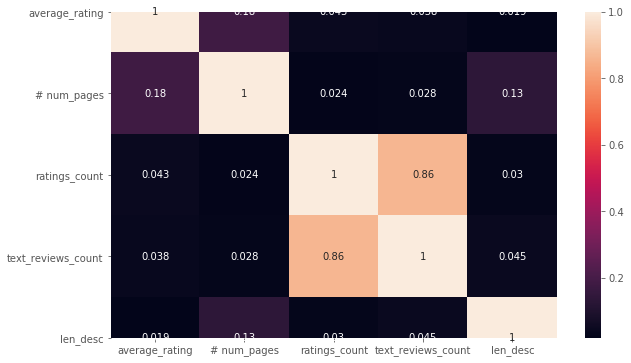

<Figure size 1440x864 with 0 Axes>

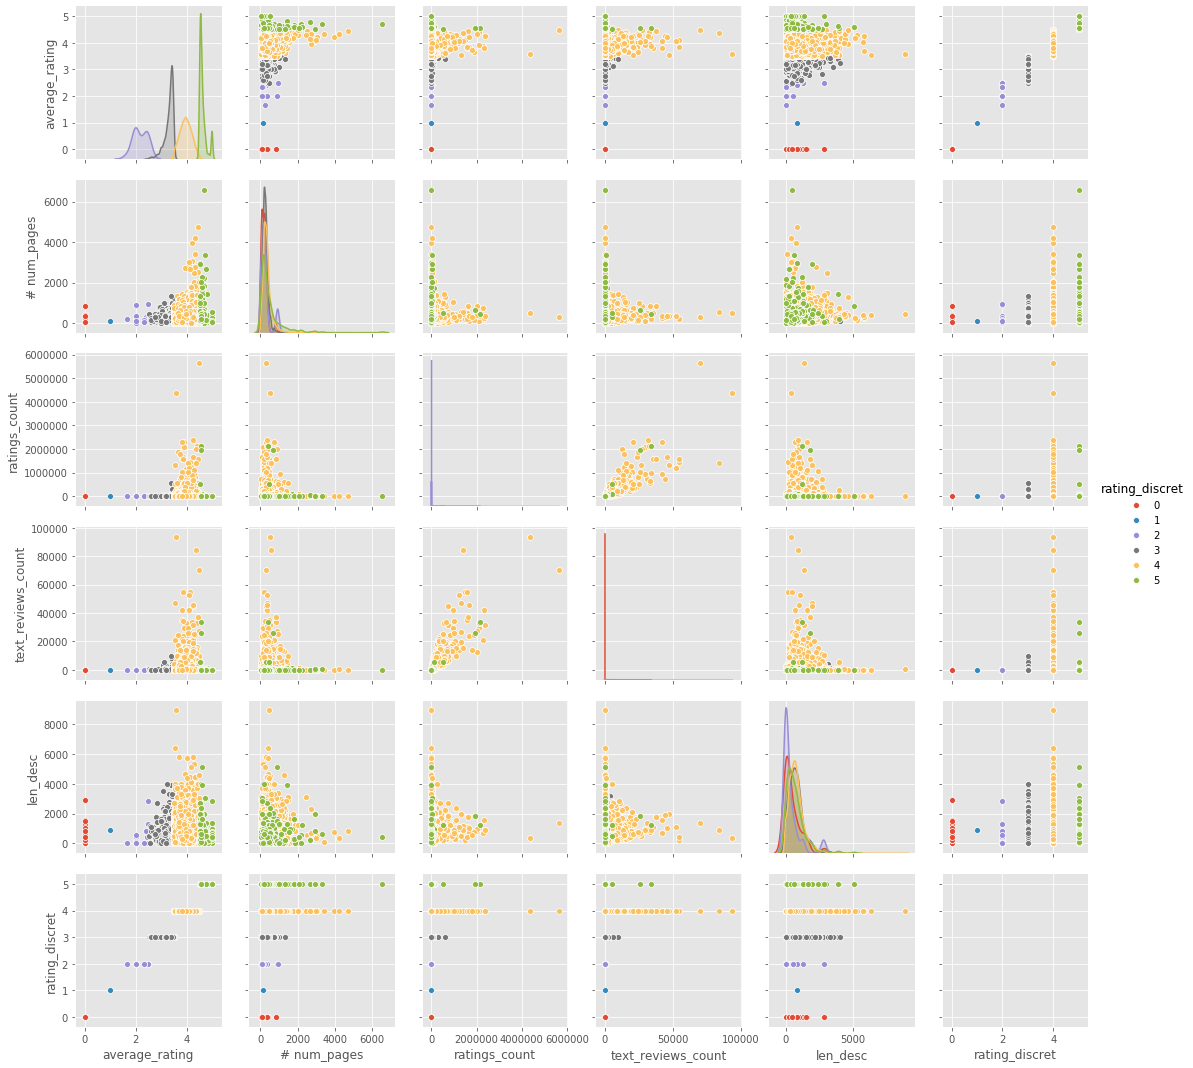

In [6]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df4[["average_rating", "# num_pages", "ratings_count", "text_reviews_count", "len_desc"]].corr(),annot=True)

plt.figure(figsize=(20,12))
df4["rating_discret"] = round(df4["average_rating"]).astype(int)
llista = ["average_rating", "# num_pages", "ratings_count", "text_reviews_count", "len_desc", "rating_discret"]
sns.pairplot(df4[llista],hue='rating_discret')

Del primer gràfic se'n dedueix que no existeix correlació entre cap parell de variables a excepció de `ratings_count`i `text_reviews_count`.

D'altra banda el segon gràfic mostra la distribució de les diferents variables numèriques i el gràfic creuat entre cada parell de variables. Crida l'atenció d'aquest darrer gràfic un 'inici' de clusterització entre les variables `#num_pages`i `len_desc` si l'etiqueta fos la variable discretitzada `rating_discret`. Utilitzarem aquest indici en posteriors apartats com a treball de clusterització.


## 3.C Reducció

#### Reducció de la Dimensionalitat
La reducció de la dimensionalitat és una de les dues possibilitats de l'etapa de de reducció. En el nostre exemple, entenem que no caldria realitzar *reducció de dimensionalitat* amb algorismes tipus **anàlisi de components principals** (PCA) donat el nombre reduït de variables amb les que es treballa i a més tenint en compte que unes estan més aviat relacionades amb els llibres i altres relacionades amb els autors.

#### Reducció de la Quantitat
La reducció de la quantitat pretén substituir el volum de dades original per tal de treballar amb un fitxer alternatiu i representatiu de l'original, utilitzant tècniques com ara clustering o sampling. Donats els objectius i la dimensió d'aquest treball no es veu necessari ni aportaria res realitzar aquest tipus de reducció. 


## 3.D Conversió

S'utilitzen en aquesta etapa tècniques que pretenen transformar les dades per tal de que les anàlisis a realitzar siguin més eficients. Entre aquestes tècniques les més emprades: normalització i discretització.

#### Normalització

Molts dels mètodes de mineria de dades són sensibles al rang de les variables que manipulen, especialment si aquests rangs són sensiblement diferents. D'altra banda, en el nostre exemple, hem vist que les variables numèriques estan en aquesta situació. Es podria aplicar, per tant, un procés de normalització *z*-score a les variables numèriques: `# num_pages`, `ratings_count`, `text_reviews_count`, `len_desc`. A l'apartat 5 es normalitzen les columnes `# num_pages` i `len_desc` per a l'exercici de segmentació.

#### Discretització

Substituir valors numèriques continus per etiquetes o categories. A l'apartat anterior ja hem utilitzat aquesta tècnica per discretitzar la variable `average_rating`, obtenint `rating_discret`.

## 3.E Valors Perduts

Si bé el fitxer d'entrada no tenia valors perduts (veure apartat [3 Neteja de Dades](#3-Neteja-de-dades)), en el procés d'integració (veure apartat [3.A Integració](#3.A-Integració) i al completar les dades, hem generat valors perduts per limitacions en el procés de recol·lecció de la informació. Existeixen, així, valors perduts, no trobats, a les variables `any_publ` (any publicació), `len_desc` (longitud descripció), `any_naix` (any naixement) i `sexe`. Donat que considerem tots els registres rellevants, no considerarem accions com ara esborrar els registres afectats. No obstant, en anàlisi posteriors, depenent del tipus d'anàlisi que realitzem, podem considerar aquesta via de no tenir en compte els registres amb valors perduts.


## 3.F Valors Extrems

A l'apartat [3 Neteja de Dades](3-Neteja-de-dades) ja s'ha vist que alguns dels valors de les variables `ratings_count` i `text_reviews_count` eren extrems tot i que vàlids. Tindrem en compte aquesta casuística en cas de ser necessari en posteriors anàlisis.


## 4 Anàlisi de dades

### 4.A Anàlisi estadística descriptiva

A l'apartat [3.B Selecció](#3.B-Selecció) ja s'ha realitzat una descripció inicial de les dades objectes d'estudi (`df3`). Així mateix en aquell apartat ja s'ha obtingut la matriu *pairplot* que mostra la distribució de les variables numèriques així com els gràfics que relacionen parells de variables. Donat que en aquell apartat s'han esborrat columnes categòriques i s'ha obtingut un nou fitxer base (`df4`) que serà la base final d'estudi, repetirem aquí les mesures de tendència central i dispersió del dataframe `df4` així com diferents gràfics descriptius de les variables categòriques.:

Indiquem a continuació:

+ Les mesures de *tendència central* i les mesures de *dispersió* de les variables numèriques. 
+ Diagrames de freqüència de les variables no numèriques
+ A títol d'exemple, histograma dels 10 primers autors amb major nombre de llibres publicats

tot orientat a *descriure* les dades objecte d'estudi. 



El nombre de columnes del fixer són: 14 i s'anomenen:
 Index(['bookID', 'title', 'average_rating', 'isbn13', 'language_code',
       '# num_pages', 'ratings_count', 'text_reviews_count', 'author_1',
       'any_publ', 'len_desc', 'any_naix', 'sexe', 'rating_discret'],
      dtype='object')

El fitxer contè 13288 files i 14 columnes.

Format de dades de cada variable del DataFrame
 bookID                  int64
title                  object
average_rating        float64
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
author_1               object
any_publ              float64
len_desc                int64
any_naix                int64
sexe                   object
rating_discret          int32
dtype: object

Mesures de tendència central i de dispersió de les columnes numèriques:
              bookID  average_rating        isbn13   # num_pages  \
count  13288.000000    13288.000000  1.3

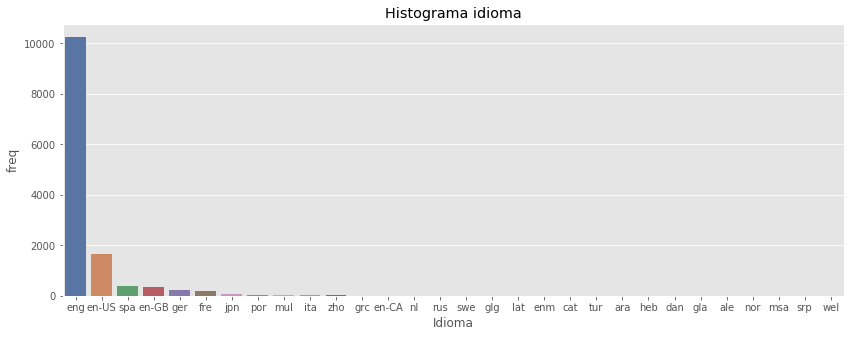

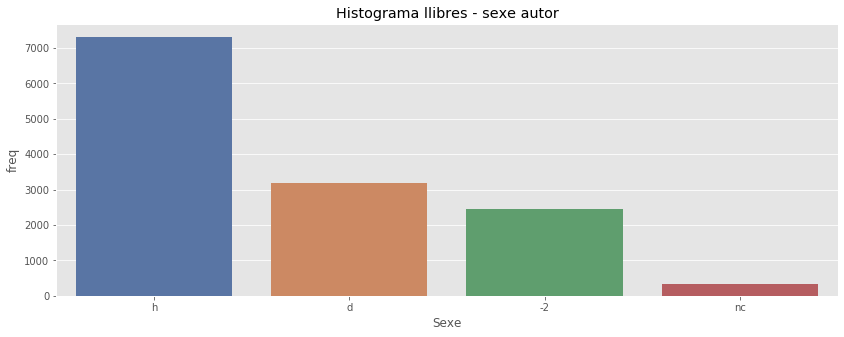

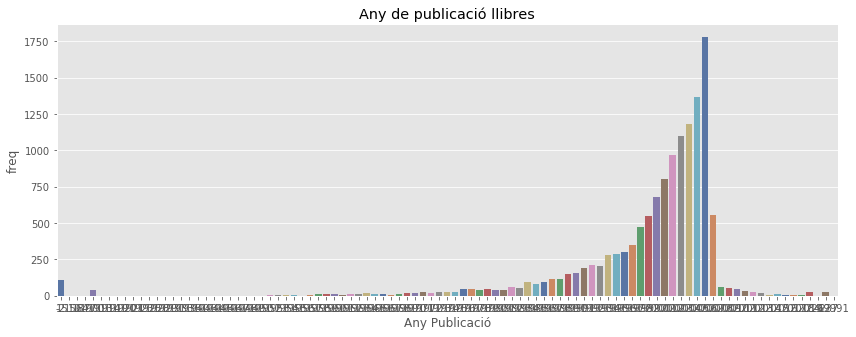

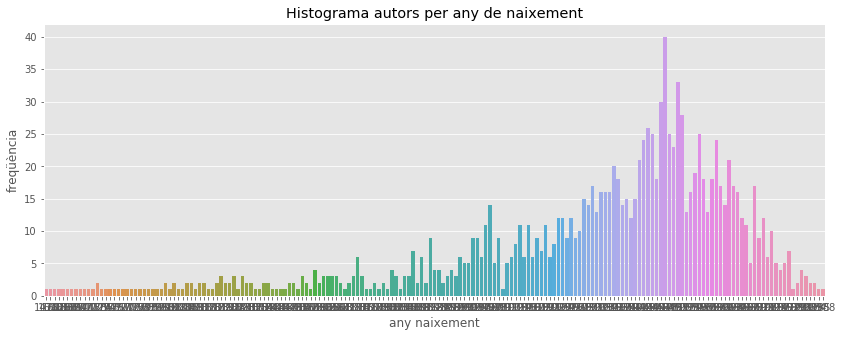

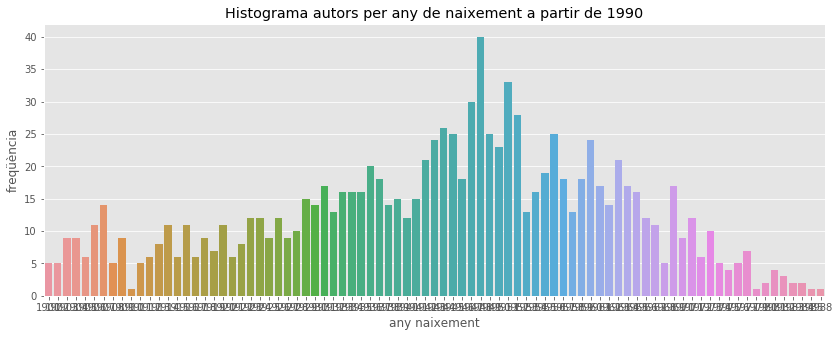

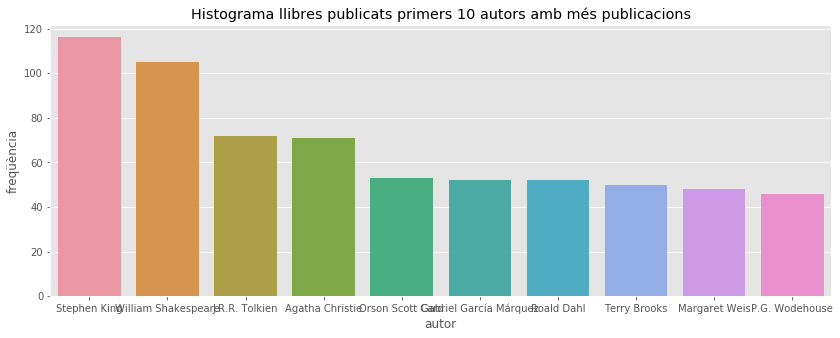

In [91]:
print("\nEl nombre de columnes del fitxer són: {} i s'anomenen:\n {}".format(len(df4.columns), df4.columns))
print("\nEl fitxer conté {} files i {} columnes.\n".format(df4.shape[0], df4.shape[1]))
print ("Format de dades de cada variable del DataFrame\n", df4.dtypes)
print("\nMesures de tendència central i de dispersió de les columnes numèriques:\n", df4.describe())
print("\nInformació de freqüències de les dades no numèriques:\n", df4.describe(exclude=[np.number]))
# print ("\nEls primers registres del fitxer són:\n", df3.head())

# Histograma de les variables categòriques

# Histograma per llibres
def hist_llibres (df, col, titol, etiqueta_x, etiqueta_y):
    plt.figure(figsize=(14,5))
    freq = df[col].value_counts()
    sns.barplot(y = freq, x = freq.index, palette="deep" )
    plt.title (titol)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.show()

# Histograma per autors
def hist_autors (df, col, titol, etiqueta_x, etiqueta_y):
    plt.figure(figsize=(14,5))
    sns.barplot(x = df.index, y=df[col])
    plt.title (titol)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.show()

hist_llibres (df4, "language_code", "Histograma idioma", "Idioma", "freq")
hist_llibres (df4, "sexe", "Histograma llibres - sexe autor", "Sexe", "freq")
dfcopia = df4.copy()
dfcopia["any_publ"] = dfcopia["any_publ"].astype(int)
hist_llibres (dfcopia, "any_publ", "Any de publicació llibres", "Any Publicació", "freq")

dfcopia = df4[df4["any_naix"] != -2].groupby("any_naix").nunique()
hist_autors(dfcopia, "author_1", "Histograma autors per any de naixement", "any naixement", "freqüència", )
# Histograma autors per any de naixement segles XX i XXI
hist_autors(dfcopia.loc[1900:2020], "author_1", "Histograma autors per any de naixement a partir de 1990", "any naixement", "freqüència", )

dfcopia = pd.DataFrame(df4['author_1'].value_counts().head(10))
hist_autors(dfcopia, "author_1", "Histograma llibres publicats primers 10 autors amb més publicacions", "autor", "freqüència", )



### 4.B Anàlisi inferencial

#### 4.B.a Correlació entre variables. Regressió Lineal

A l'apartat [3.B Selecció](#3.B-Selecció) ja s'ha mostrat la correlació entre variables del fitxer. S'ha mostrat a la gràfica heatmap que hi ha una alta correlació entre `ratings_count`i `text_reviews_count`.

Podem, per tant, considerar un mètode de *regressió lineal* que relacioni ambdues variables i pugui predir nous valors de `ratings_count` en funció de `text_reviews_count` 


<function matplotlib.pyplot.show(*args, **kw)>

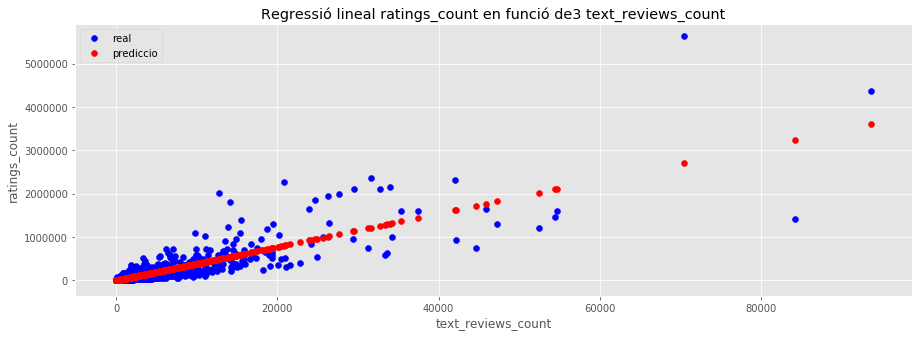

In [12]:
from sklearn.linear_model import LinearRegression

# regressió lineal: ratings_count en funció de text_reviews_count
x    = np.array(df4["text_reviews_count"]).reshape((-1, 1))
y    = np.array(df4["ratings_count"])
model            = LinearRegression().fit(x,y)
prediccio        = model.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.scatter(x,y, color="blue", label="real")
plt.scatter(x,prediccio, color="red", label="prediccio")
plt.legend(loc="upper left")
plt.title("Regressió lineal ratings_count en funció de3 text_reviews_count")
plt.ylabel("ratings_count")
plt.xlabel("text_reviews_count")
plt.show

#### 4.B.b Comprovació de normalitat i homoscedasticitat

Donat que algunes proves estadístiques requereixen de la comprovació de la normalitat i de la homoscedasticitat de les mostres objecte d'estudi, estudiem a continuació:

+ Si la columna `average_rating` segueix una distribució normal. Per a fer-ho, utilitzarem el test de Shapiro-Wilk. Aquest test assumeix com a hipòtesi nul·la que la població està distribuïda normalment i si el *p-valor* és més petit que el nivell de significació (normalment es considera com a llindar 0.05), llavors l'hipòtesi nul·la es rebutja i, consegüentment, la mostra no segueix una distribució normal. En base a aquests conceptes, veurem a continuació que els resultats mostren que `average_rating` no segueix una distribució normal. 
+ Si les mostres de dones i homes del fitxer, columna `average_rating`, tenen la mateixa variància. Donat que el punt anterior ha demostrat que aquesta columna no segueix una distribució normal, utilitzarem el test no paramètric de Fligner-Killeen. De manera semblant a Saphiro, s'obté el p-valor i si aquest és inferior a 0.05 es rebutja l'hipòtesi nul·la que en aquest cas és considerar que les dues mostres tenen la mateixa variància. Veurem en aquest cas, que p-valor és superior a 0.05 i per tant la variança de les dues mostres és idèntica. 

In [25]:
from scipy import stats
x = df4["average_rating"]
print ("Resultat del test shapiro: ", stats.shapiro(x))
print ("El p-valor per comprovar si average_rating segueix una distribució normal és: ", stats.shapiro(x)[1])

x = df4[df4["sexe"] == "d"]["average_rating"]
x = np.array(x)
y = df4[df4["sexe"] == "h"]["average_rating"]
y = np.array(y)
print("\nResultat del test fligner: ", stats.fligner(x,y))

Resultat del test shapiro:  (0.795940101146698, 0.0)
El p-valor per comprovar si average_rating segueix una distribució normal és:  0.0

Resultat del test fligner:  FlignerResult(statistic=0.33484954377661974, pvalue=0.5628173583298723)


#### 4.B.c Contrast d'hipòtesis

Sovint interessa comprovar si dos grups de dades (en el nostra cas `sexe` de l'autor) tenen la mateixa mitjana poblacional per a una determinada variable. Per a aquesta comprovació es disposa de diferents tests, paramètrics o no paramètrics, en funció de si les mostres segueixen una distribució normal i tenen homoscedasticitat.

Ens plantegem en la nostra pràctica si la mitjana poblacional d'homes i dones tenen la mateixa mitjana en funció de la mostra de que es disposa per a la variable `average_rating`. Ja s'ha vist que la distribució de la mostra no és normalitzada, d'altra banda el nombre de llibres amb autors dones són diferents del nombre de llibres d'autors homes, per tant utilitzarem el test de Kruskal-Wallis.

Veurem que com a resultat del test de Kruskal-Wallis, el p-valor és gairebé zero i, per tant, les dues mostres tenen diferent distribució i podem rebutjar la hipòtesi nul·la de que les dues mostres tenen la mateixa mitjana poblacional per a la variable `average_rating`.


Tes de Kruskal-Wallis
Estadístiques=36.583, p=0.000
Donat que p-valor es  0.0  inferior a  0.05 les dues mostres tenen diferent distribució (es rebutja H0)

Boxplot de la distribució de average_rating per sexe


<function matplotlib.pyplot.show(*args, **kw)>

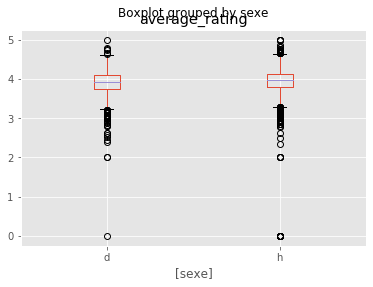

In [55]:
import statsmodels.api as sm
from scipy.stats import kruskal

df_aol = df4.loc[ (df4["sexe"] == "d") | (df4["sexe"] == "h") ]
df_aol = df_aol[["average_rating", "sexe"]]

x = np.array(df_aol[df_aol["sexe"]=="d"]["average_rating"])
y = np.array(df_aol[df_aol["sexe"]=="h"]["average_rating"])
stat, p = kruskal(x,y)

print ("Test de Kruskal-Wallis")
print ("======================")
print('Estadístiques=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:
    print("Donat que p-valor es ", round(p,5), " superior a ", alpha, 
          "les dues mostres tenen la mateixa distribució (no es pot rebutjar H0)\n")
else:
    print("Donat que p-valor es ", round(p,5), " inferior a ", alpha, 
          "les dues mostres tenen diferent distribució (es rebutja H0)\n")
    
print ("Boxplot de la distribució de average_rating per sexe")
print ("====================================================")
df_aol.boxplot (by = "sexe")
plt.show


### 5 Clusterització


Sovint pot ser interessant caracteritzar un conjunt d'observacions en grups homogenis. Es tracta de mètodes no supervisats,  que per la seva naturalesa, identifiquen aquests grups homogenis cercant centres dels grups (centroide), que minimitzen la distància de tots els elements del grup respecte el seu centroide.

Apliquem a títol d'exemple el mètode de classificació no supervisat *k-means* sobre una selecció de les variables del fitxer: `# num_pages` i `len_desc`. 

Es calcula inicialment, mitjançant la *regla del colze* el nombre de clústers mínim a partir del qual la *funció d'error* (suma d'errors quadràtics) no disminueix significativament. Definit aquest nombre de clústers màxim aplicarem l'algorisme *k_means* 

Kmeans. Regla del colze:


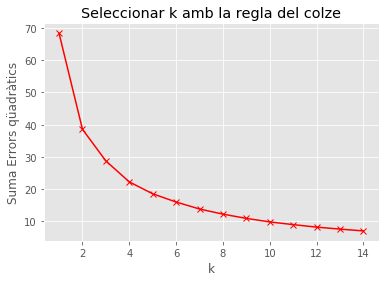

In [98]:
from sklearn.cluster import KMeans

df_kmeans = df4[["# num_pages", "len_desc"]]
df_kmeans = df_kmeans[df_kmeans["len_desc"] != -2]


# Normalitzar pel màxim les dues columnes
for i in range (2):
    df_kmeans.iloc[:,i] = df_kmeans.iloc[:,i]/max(df_kmeans.iloc[:,i])

def regla_colze (df):
    K = range(1, 15)     # K nombre màxim de clústers per anar iterant cada model possible i trobar el k final
    SSE = []             # Vector on cada element de SSE contindrà la suma d'errors quadràtics per a cada valor possible k
    for k in K:          # Itera per a cada k clúster possible    
        # Model KMeans
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        # Càlcul manual del SSE (suma errors quadràtics) de cada iteració de k cluster
        # kmean.labels és un vector amb les mateixes files que df i conté la classe a la que pertany cada observació
        # kmeans.cluster_centers és un vector amb els k punts centroids d'aquesta iteració
        suma   = 0
        for j in range(df.shape[0]):
            t = df.iloc[j,:] - kmeans.cluster_centers_[kmeans.labels_[j]]
            t = [x**2 for x in t]
            suma = suma + sum(t)
        SSE.append(suma)
    #    print ("Suma Errors quadratics calculada manualment: ", suma)
    #    Comprovació. Ja que kmeans.intertia_ proporciona directament la suma d'errors quadràtics.
    #    print ("Suma Errors quadratics calculada per l'algoritme: ", kmeans.inertia_)
    
    plt.plot(K, SSE, 'rx-')
    plt.xlabel('k')
    plt.ylabel('Suma Errors qüadràtics')
    plt.title('Seleccionar k amb la regla del colze')
    plt.show()
    
print ("Kmeans. Regla del colze:")
print ("========================")

regla_colze(df_kmeans)


<function matplotlib.pyplot.show(*args, **kw)>

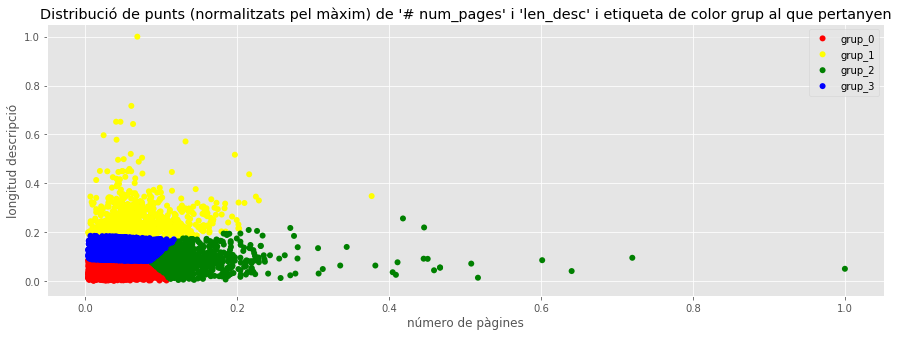

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# for k in range(len(df_kmeans)):

kmeans = KMeans(n_clusters=4)
pred_y = kmeans.fit_predict(df_kmeans [["# num_pages", "len_desc"]])

pred_ets  = ["grup_0", "grup_1", "grup_2", "grup_3", "grup_4", "grup_5"]
colors    = ["red", "yellow", "green", "blue", "black", "cyan"]  
        
for k in range(4):
    punts = df_kmeans[pred_y == k]
    x     = punts.iloc [:, 0]
    y     = punts.iloc [:, 1]
    plt.scatter(x, y, label=pred_ets[k], c=colors[k], edgecolors='none')
plt.legend(loc="upper right")
plt.title("Distribució de punts (normalitzats pel màxim) de '# num_pages' i 'len_desc' i etiqueta de color del grup al que pertanyen")
plt.ylabel("longitud descripció")
plt.xlabel("número de pàgines")
plt.show



# 6 Resum

S'ha realitzat aquest treball a partir d'un fitxer amb dades de la web **Goddreads** dedicada a la recomanació de llibres exttet de https://www.kaggle.com/jealousleopard/goodreadsbooks. El treball ha constat de:
+ Una etapa de neteja de les dades del propi fitxer.
+ Completar les dades del fitxer amb noves columnes extretes, amb tècniques de `web scraping`, de les webs de **Goodreads**, **ISBN** i **Wikipedia**.
+ S'ha revisat detalladament cadascuna de les etapes de *neteja de dades* proposades a la [documentació de l'aula](#biblio-1). 
+ En quant a *Anàlisi Descriptiva* s'ha obtingut diferent informació relativa a mesures de tendència central, de dispersió, anàlisi de correlació, relacions entre variables, diagrames de barres sobre variables no categòriques, ...
+ En quant a *Anàlisi Inferencial* s'han realitzat exercicis de regressió lineal, comprovació de normalitat i homoscedasticitat i contrast d'hipòtesi. Com a resultats concrets, s'ha comprovat que `average_rating` no segueix una distribució normal i que podem rebutjar que les mitjanes poblacionals de `average_rating` per sexe d'autors dels llibres (en aquest cas la població seria tots els llibres avaluats a **Goodreads**) siguin les mateixes a partir d'aquesta mostra concreta de la que s'ha disposat. No obstant, es desconeix com s'ha obtingut la mostra i per tant aquesta aparent generalització no es pot considerar correcta, només ha servit com a exercici pràctic de l'assignatura.
+ En darrer lloc s'ha realitzat un procés de segmentació amb el mètode no supervisat *k*-means aplicat a les columnes `# num_pages` (número de pàgines del llibre) i `len_desc` (longitud de la descripció del llibre a **Goodreads**).


# 7 Bibliografia

<a id='biblio-1'></a>[1] Introducció a la neteja i anàlisi de dades. Mireia Calvo González, Diego Oswaldo Pérez Trenard, Laia Subirats Maté. Editorial UOC. PID_00265701

<a id='biblio-2'></a>[2] https://www.kaggle.com/hoshi7/goodreads-analysis-and-recommending-books. kernel que comenta el fitxer objecte d'estudi.